In [16]:
!pip install pandas networkx matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [17]:
!pip install pandas networkx

Defaulting to user installation because normal site-packages is not writeable


Nodes values: "conservative," "liberal," and "neutral"

## Data Loading

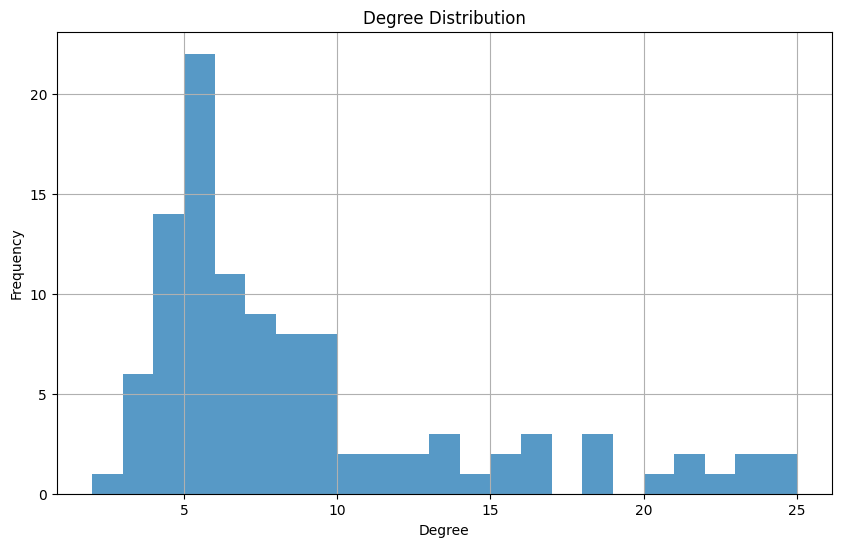

Number of nodes: 105
Number of edges: 441
Average degree: 8.40
Max degree: 25
Min degree: 2


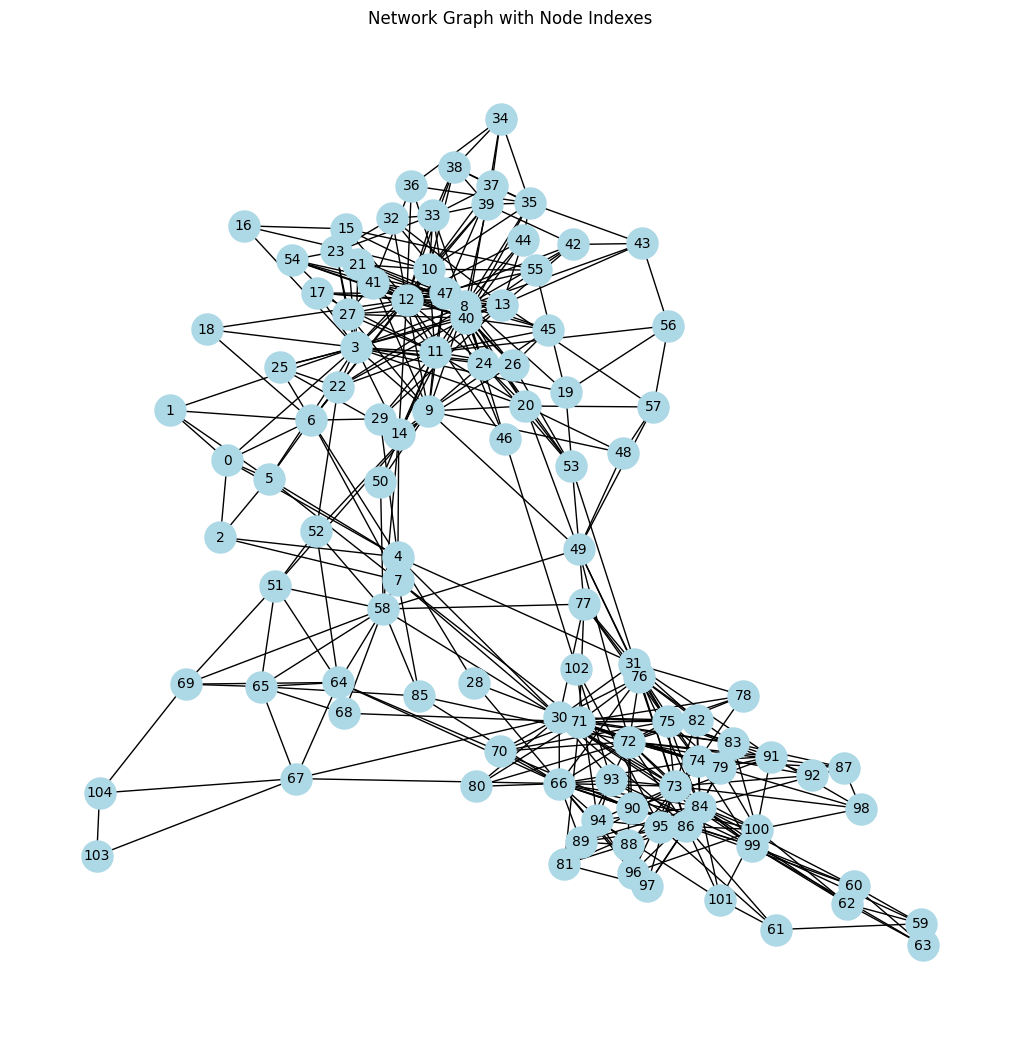

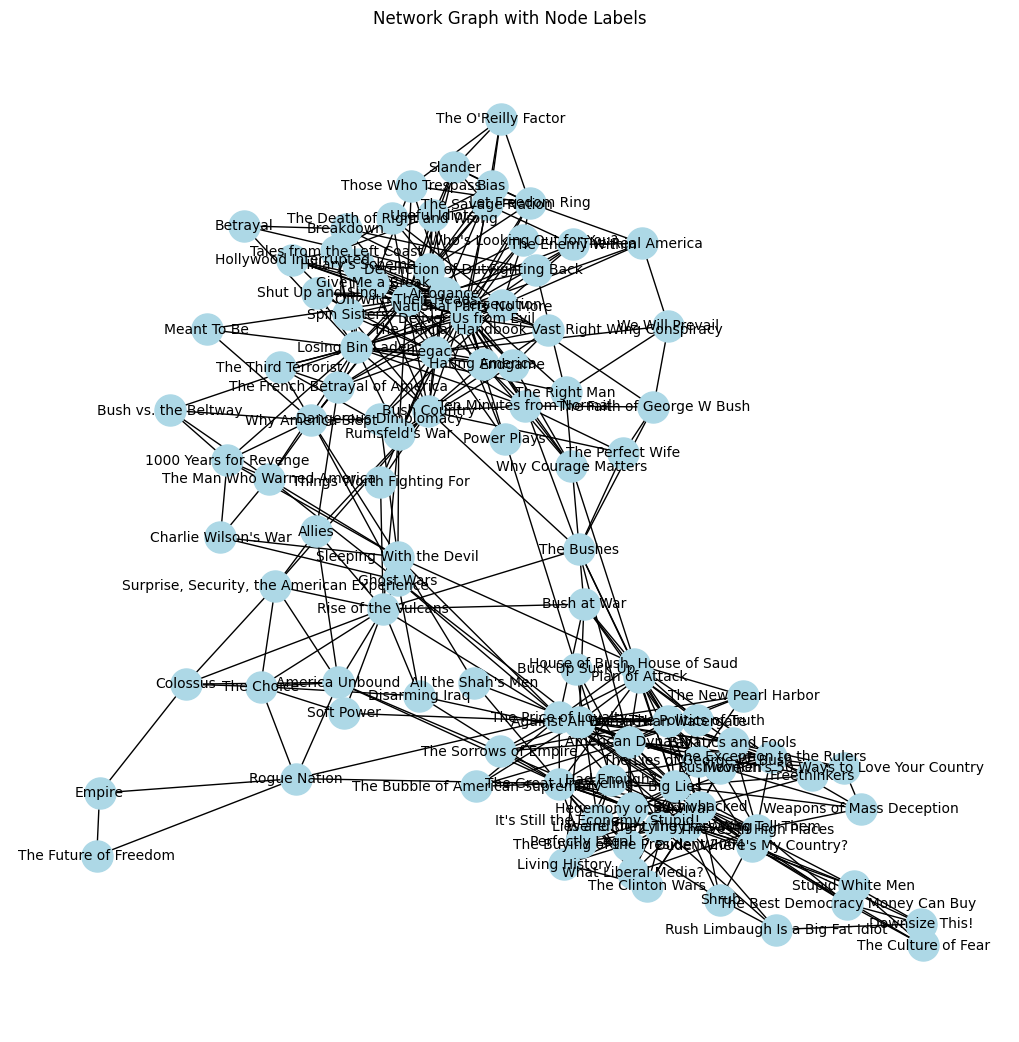

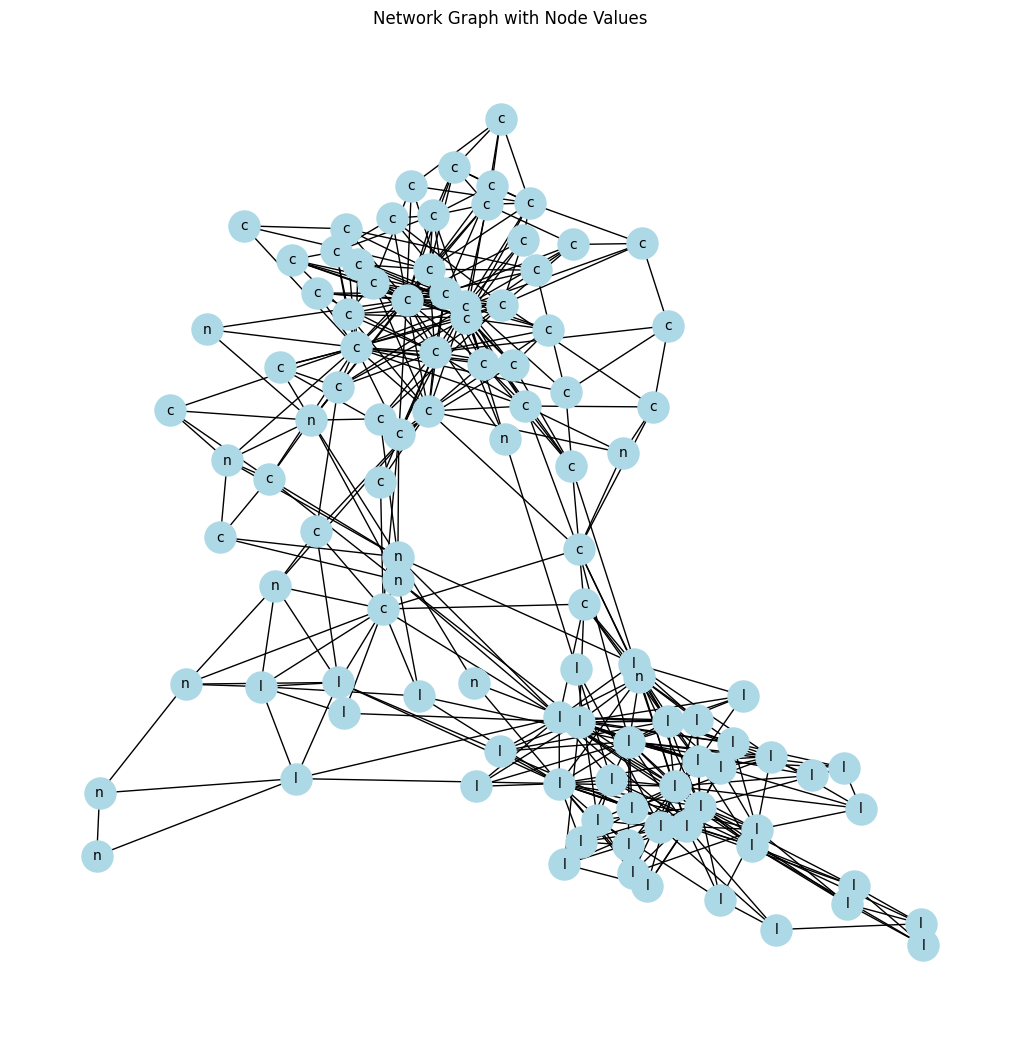

In [78]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the datasets
edges_df = pd.read_csv('./data/edges.csv', header=0, names=['source', 'target'])
nodes_df = pd.read_csv('./data/nodes.csv', header=0, names=['index', 'label', 'value', '_pos'])

# Create a graph using the edges dataframe
G = nx.from_pandas_edgelist(edges_df, 'source', 'target')

# Add node attributes from nodes_df (matching by 'index' column)
for _, row in nodes_df.iterrows():
    if row['index'] in G.nodes:
        G.nodes[row['index']]['label'] = row['label']
        G.nodes[row['index']]['value'] = row['value']

# Metrics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
avg_degree = sum(dict(G.degree()).values()) / num_nodes
degree_distribution = [deg for node, deg in G.degree()]

# Plot Degree Distribution
plt.figure(figsize=(10, 6))
plt.hist(degree_distribution, bins=range(min(degree_distribution), max(degree_distribution) + 1), alpha=0.75)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print some network metrics
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Average degree: {avg_degree:.2f}")
print(f"Max degree: {max(degree_distribution)}")
print(f"Min degree: {min(degree_distribution)}")

# Function to draw the graph with different node attributes
def plot_graph_with_attributes(attribute_name, title, seed=42):
    node_labels = {node: str(node) for node in G.nodes} if attribute_name == 'index' else {node: G.nodes[node].get(attribute_name, '') for node in G.nodes}
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, seed=seed)
    nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=500, node_color='lightblue', font_size=10)
    plt.title(title)
    plt.show()

# Plot the graph using different node attributes
plot_graph_with_attributes('index', 'Network Graph with Node Indexes')
plot_graph_with_attributes('label', 'Network Graph with Node Labels')
plot_graph_with_attributes('value', 'Network Graph with Node Values')


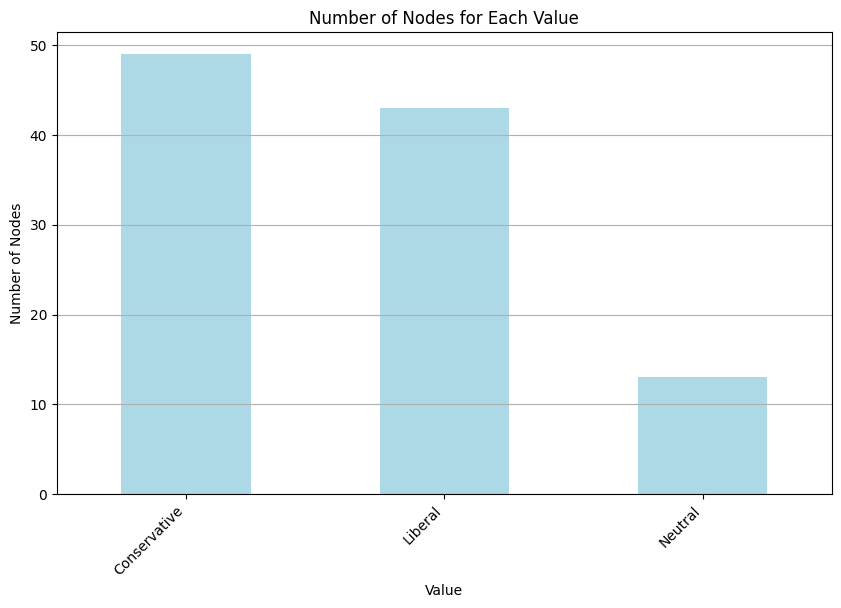

In [79]:
# Map values to more descriptive labels
value_mapping = {'l': 'Liberal', 'n': 'Neutral', 'c': 'Conservative'}

# Get the 'value' attribute for each node and map it to the corresponding label
node_values = [value_mapping.get(G.nodes[node]['value'], G.nodes[node]['value']) for node in G.nodes]

# Count the occurrences of each label
value_counts = pd.Series(node_values).value_counts()

# Plot the value counts as a bar plot
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar', color='lightblue')
plt.title('Number of Nodes for Each Value')
plt.xlabel('Value')
plt.ylabel('Number of Nodes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.show()


## PageRank

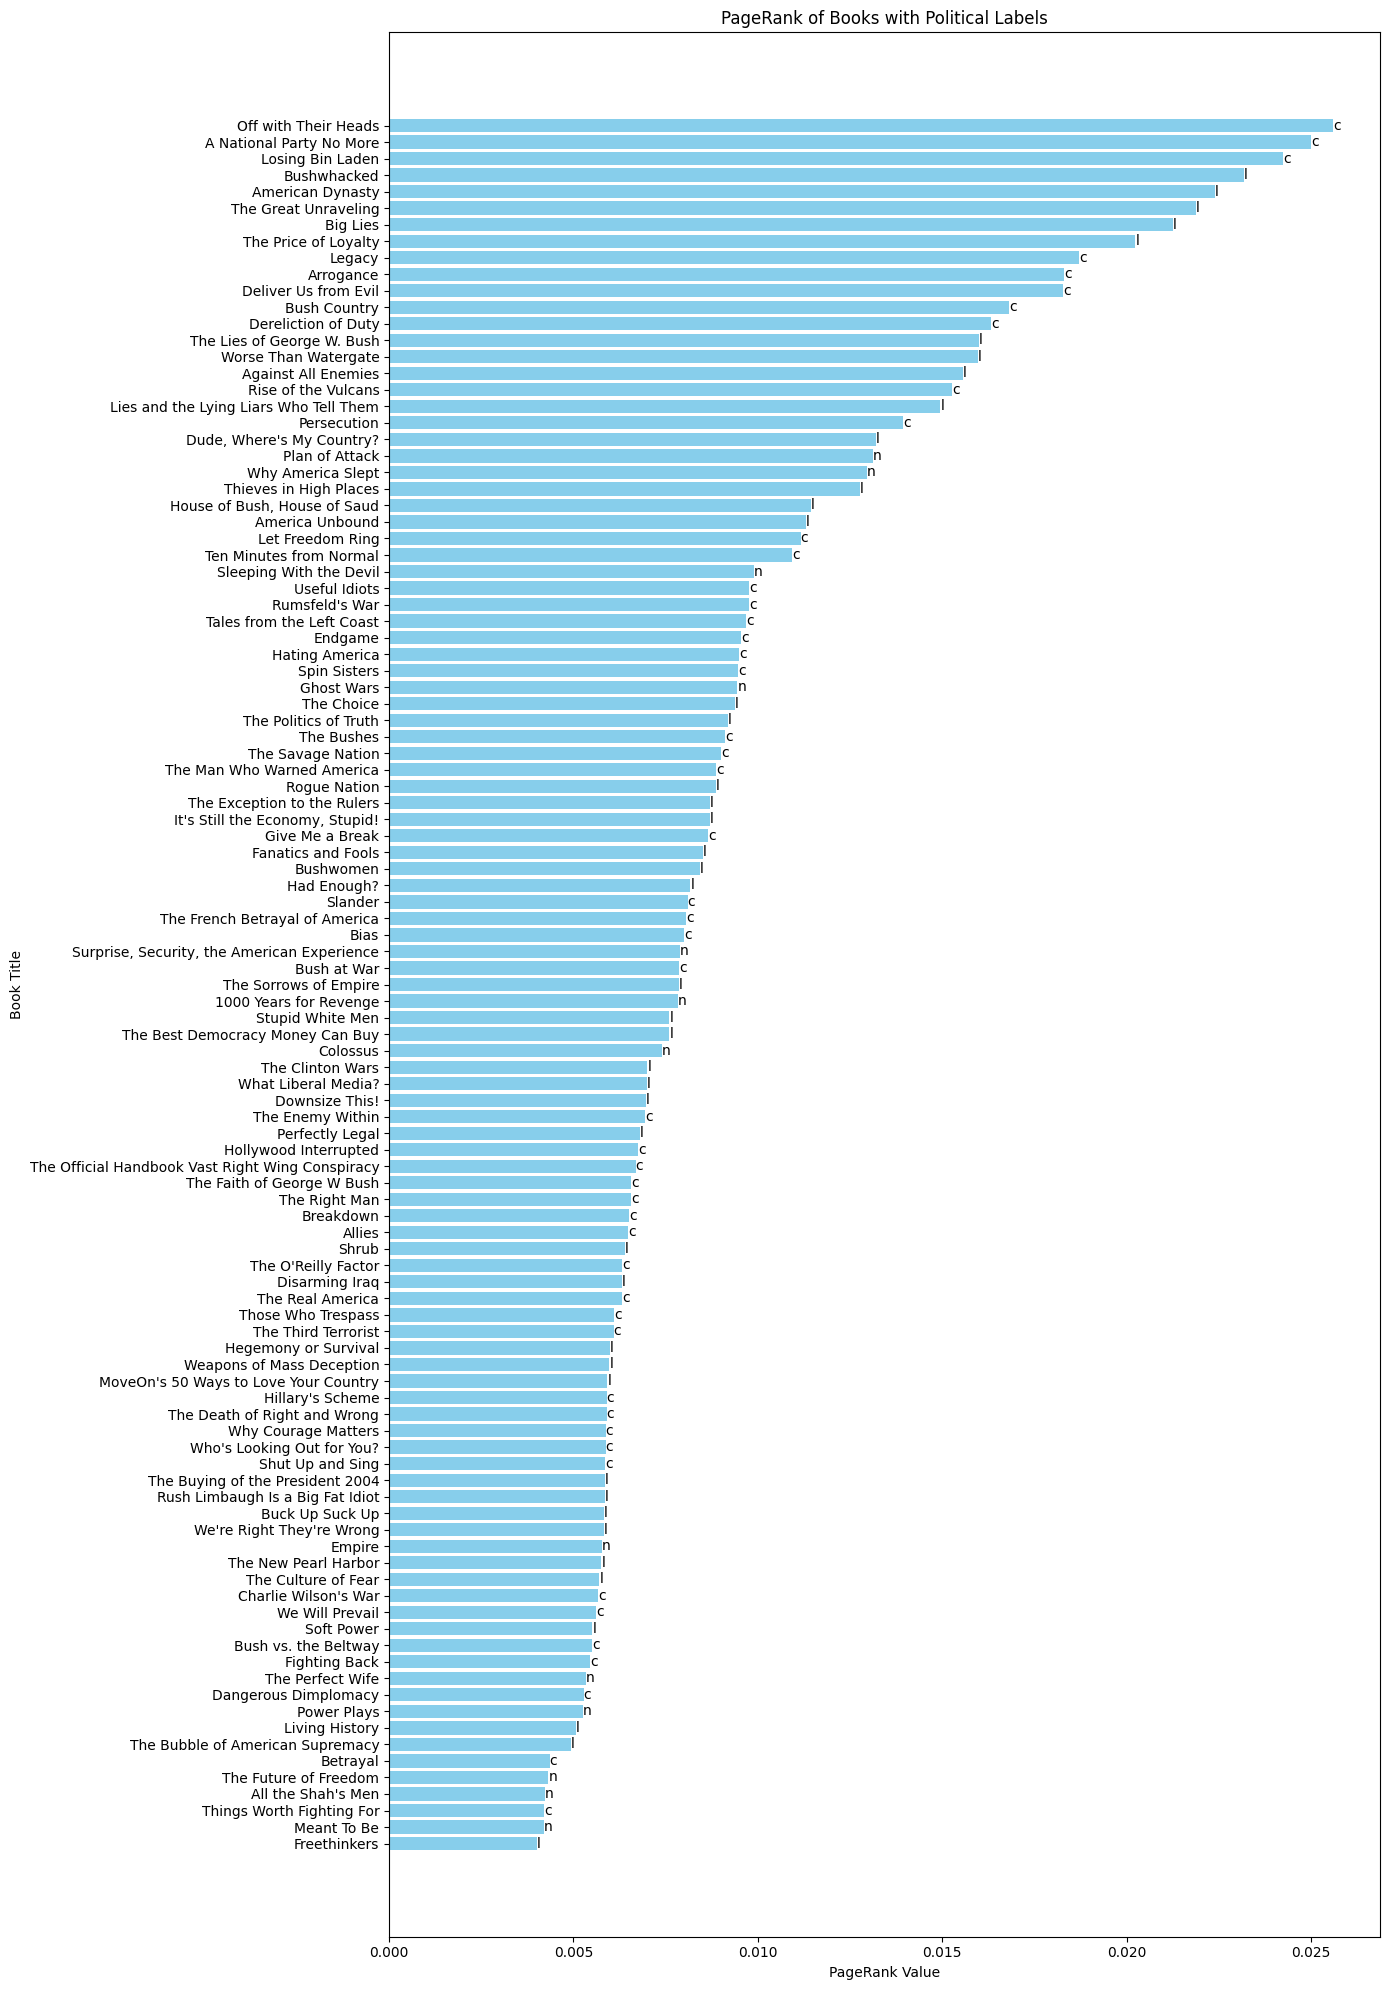

Book Title  PageRank  \
12                               Off with Their Heads  0.025587   
8                            A National Party No More  0.024990   
3                                    Losing Bin Laden  0.024230   
84                                        Bushwhacked  0.023180   
72                                   American Dynasty  0.022393   
66                               The Great Unraveling  0.021868   
73                                           Big Lies  0.021253   
30                               The Price of Loyalty  0.020231   
11                                             Legacy  0.018712   
47                                          Arrogance  0.018305   
40                               Deliver Us from Evil  0.018267   
9                                        Bush Country  0.016811   
10                                Dereliction of Duty  0.016323   
74                         The Lies of George W. Bush  0.015985   
75                               Worse Than Watergate  0.015954   
71                                Against All Enemies  0.015559   
58                                Rise of the Vulcans  0.015260   
86             Lies and the Lying Liars Who Tell Them  0.014946   
13                                        Persecution  0.013943   
99                          Dude, Where's My Country?  0.013204   
76                                     Plan of Attack  0.013109   
6                                   Why America Slept  0.012958   
100                            Thieves in High Places  0.012763   
31                       House of Bush, House of Saud  0.011447   
64                                    America Unbound  0.011310   
34                                   Let Freedom Ring  0.011160   
20                            Ten Minutes from Normal  0.010924   
4                             Sleeping With the Devil  0.009884   
33                                      Useful Idiots  0.009764   
14                                     Rumsfeld's War  0.009759   
23                          Tales from the Left Coast  0.009686   
26                                            Endgame  0.009548   
24                                     Hating America  0.009492   
27                                       Spin Sisters  0.009468   
7                                          Ghost Wars  0.009447   
65                                         The Choice  0.009373   
82                              The Politics of Truth  0.009190   
49                                         The Bushes  0.009104   
39                                  The Savage Nation  0.008999   
5                          The Man Who Warned America  0.008865   
67                                       Rogue Nation  0.008858   
91                        The Exception to the Rulers  0.008707   
94                    It's Still the Economy, Stupid!  0.008690   
41                                    Give Me a Break  0.008657   
83                                 Fanatics and Fools  0.008501   
79                                          Bushwomen  0.008417   
93                                        Had Enough?  0.008170   
38                                            Slander  0.008096   
22                     The French Betrayal of America  0.008059   
37                                               Bias  0.007996   
51        Surprise, Security, the American Experience  0.007887   
77                                        Bush at War  0.007872   
70                              The Sorrows of Empire  0.007855   
1                              1000 Years for Revenge  0.007828   
59                                   Stupid White Men  0.007601   
62                   The Best Democracy Money Can Buy  0.007598   
69                                           Colossus  0.007390   
97                                   The Clinton Wars  0.007003   
96                                What Liberal Media?  0.006982   
60                     

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your graph has 'label' for title and 'value' for political label
pagerank = nx.pagerank(G)

# Extract titles (labels), PageRank values, and political labels (values)
titles = [G.nodes[node].get('label', '') for node in G.nodes]  # Get 'label' attribute or node ID
pagerank_values = [pagerank[node] for node in G.nodes]
political_labels = [G.nodes[node].get('value', '') for node in G.nodes]  # Get 'value' for political label

# Create a DataFrame for easy handling
df_pagerank = pd.DataFrame({
    'Book Title': titles,
    'PageRank': pagerank_values,
    'Political Label': political_labels
})

# Sort the DataFrame by PageRank values (highest to lowest)
df_pagerank_sorted = df_pagerank.sort_values(by='PageRank', ascending=False)

# Plotting the PageRank values with political labels
plt.figure(figsize=(14, 20))  # Increase figure size for more space
bars = plt.barh(df_pagerank_sorted['Book Title'], df_pagerank_sorted['PageRank'], color='skyblue', height=0.8)

# Annotate each bar with the political label
for i, bar in enumerate(bars):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
             df_pagerank_sorted['Political Label'].iloc[i], 
             va='center', ha='left', fontsize=10, color='black')

plt.title('PageRank of Books with Political Labels')
plt.xlabel('PageRank Value')
plt.ylabel('Book Title')
plt.gca().invert_yaxis()  # Invert y-axis to show the top-ranked books at the top
plt.tight_layout()
plt.show()
pd.set_option('display.max_rows', None)
df_pagerank_sorted

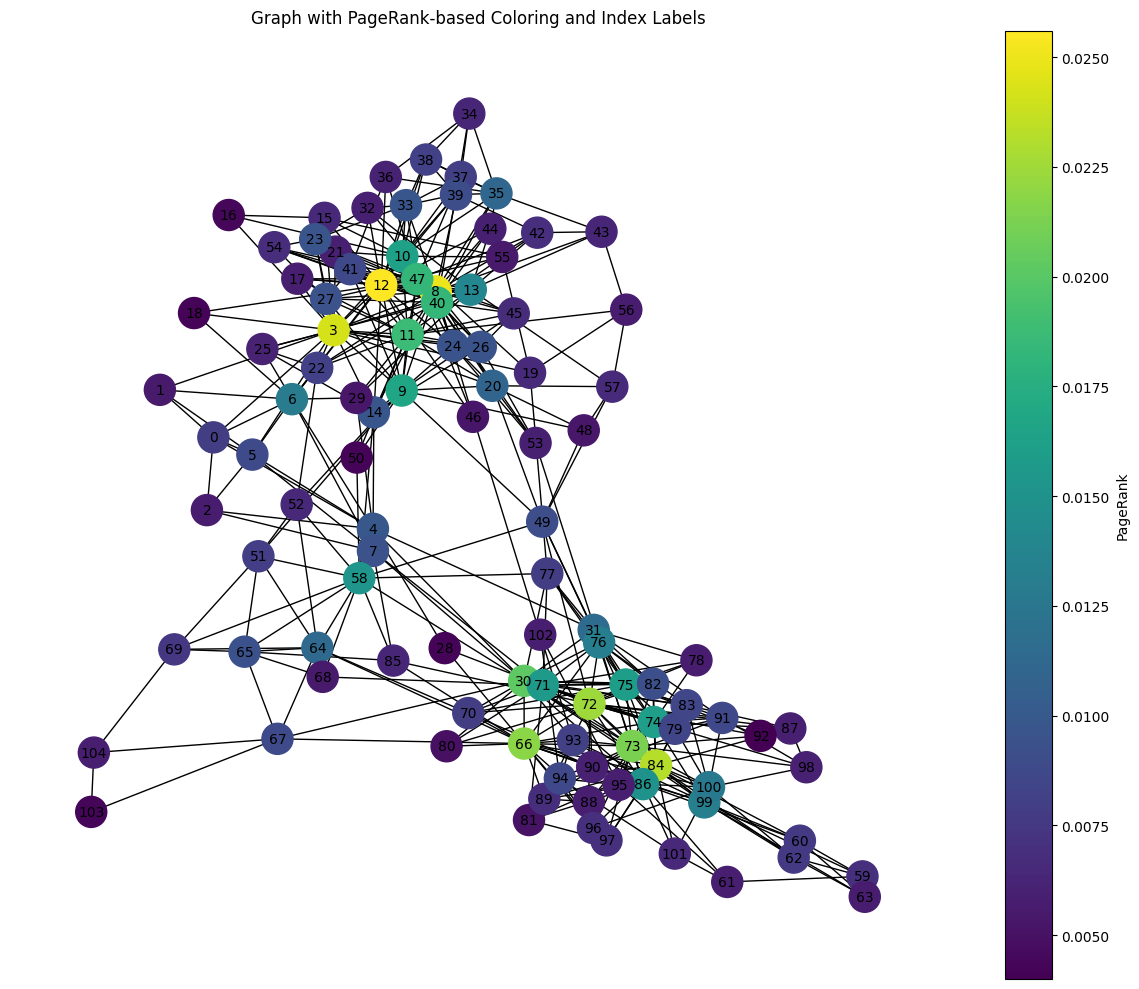

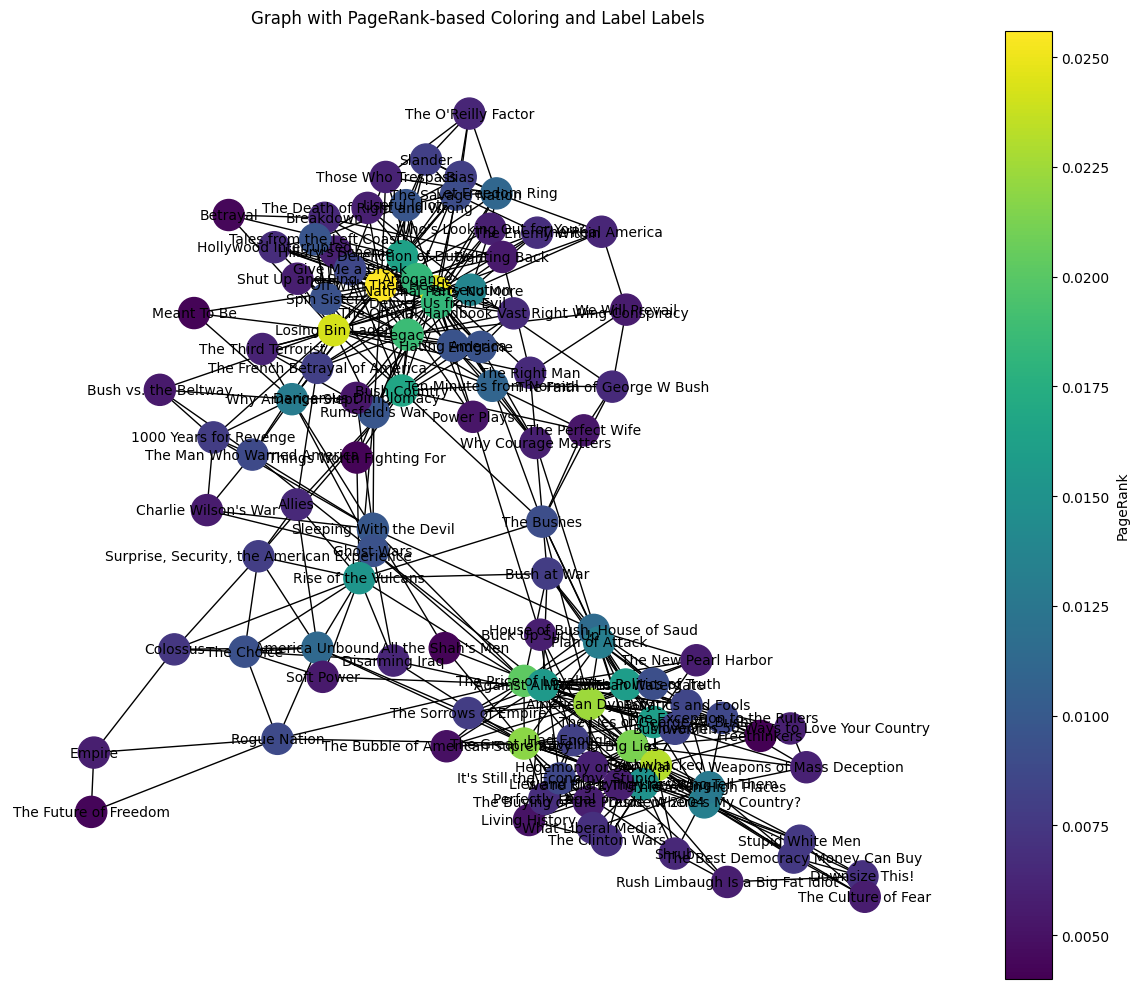

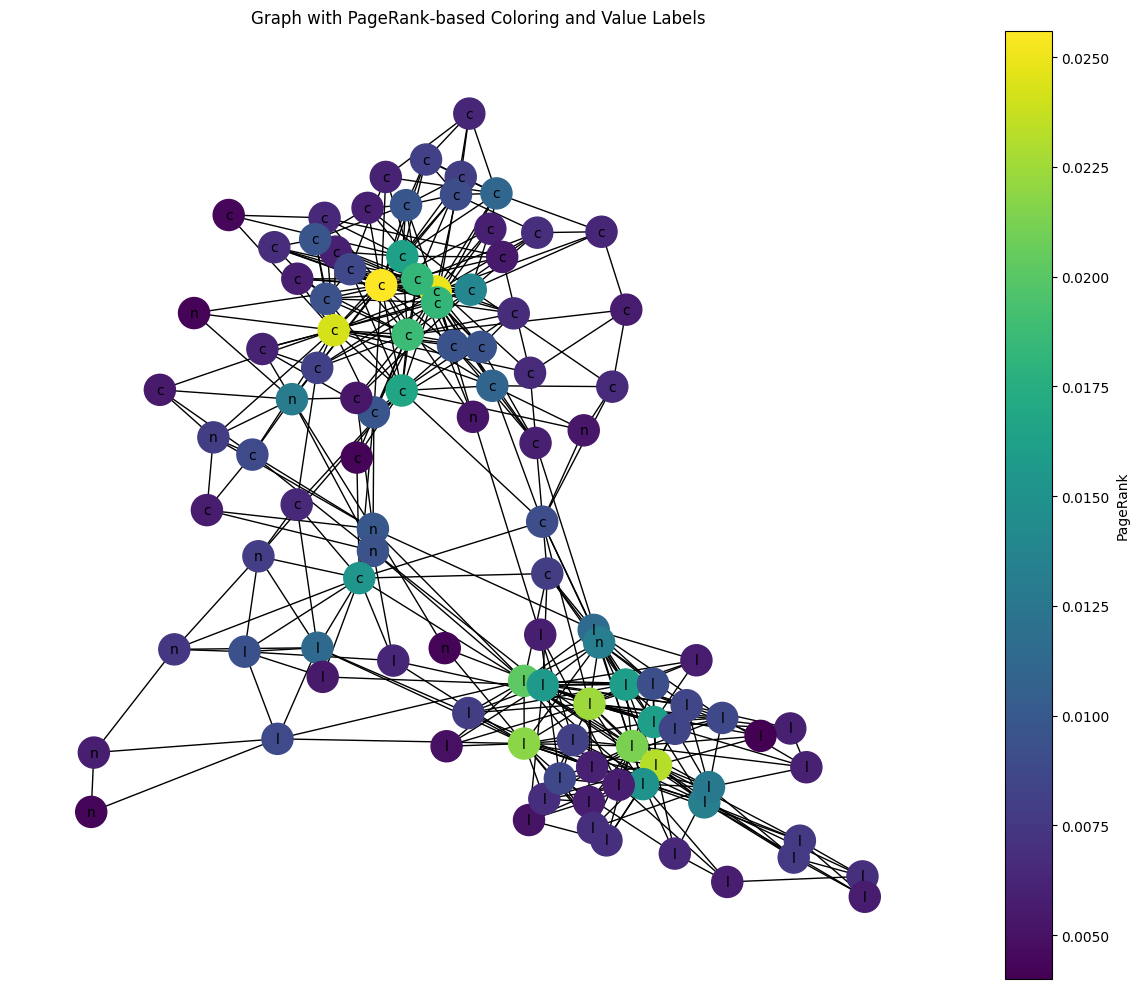

In [83]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib as mpl

# Function to plot the graph with different text labels and PageRank-based coloring
def plot_graph_with_labels(G, pagerank, label_type='index'):
    """
    Plot the graph with nodes colored by PageRank and labeled by the chosen type.

    Parameters:
    - G: The NetworkX graph
    - pagerank: The PageRank values of the nodes
    - label_type: The type of label ('index', 'label', or 'value')
    """
    # Extract node information
    node_indices = list(G.nodes)  # Node indices
    node_labels = [G.nodes[node].get('label', '') for node in G.nodes]  # Using 'label' attribute
    node_values = [G.nodes[node].get('value', '') for node in G.nodes]  # Using 'value' attribute

    # Format the node text based on the chosen label type
    if label_type == 'index':
        node_texts = [node for node in node_indices]
    elif label_type == 'label':
        node_texts = [label for label in node_labels]
    elif label_type == 'value':
        node_texts = [value for value in node_values]
    else:
        raise ValueError("Invalid label_type. Choose from 'index', 'label', or 'value'.")

    # Define colormap for coloring based on PageRank
    cmap = plt.cm.viridis

    # Create a figure for plotting
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Node colors based on PageRank
    node_colors = [pagerank[node] for node in G.nodes]

    pos = nx.spring_layout(G, seed=42)  # Use a consistent layout
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=500, ax=ax)
    nx.draw_networkx_edges(G, pos, ax=ax)
    nx.draw_networkx_labels(G, pos, labels={node: text for node, text in zip(G.nodes, node_texts)}, font_size=10, ax=ax)

    # Title and axis settings
    ax.set_title(f'Graph with PageRank-based Coloring and {label_type.capitalize()} Labels')
    ax.axis('off')  # Hide the axis
    
    # Add colorbar for PageRank
    norm = mpl.colors.Normalize(vmin=min(pagerank.values()), vmax=max(pagerank.values()))
    cbar = fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), ax=ax, orientation='vertical')
    cbar.set_label('PageRank')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Call the function 3 times with different label types
plot_graph_with_labels(G, pagerank, label_type='index')   # Plot with index
plot_graph_with_labels(G, pagerank, label_type='label')   # Plot with label
plot_graph_with_labels(G, pagerank, label_type='value')   # Plot with value


## k-Core Decomposition

Num of nodes with core number 2: 2
Num of nodes with core number 3: 5
Num of nodes with core number 4: 33
Num of nodes with core number 5: 25
Num of nodes with core number 6: 40


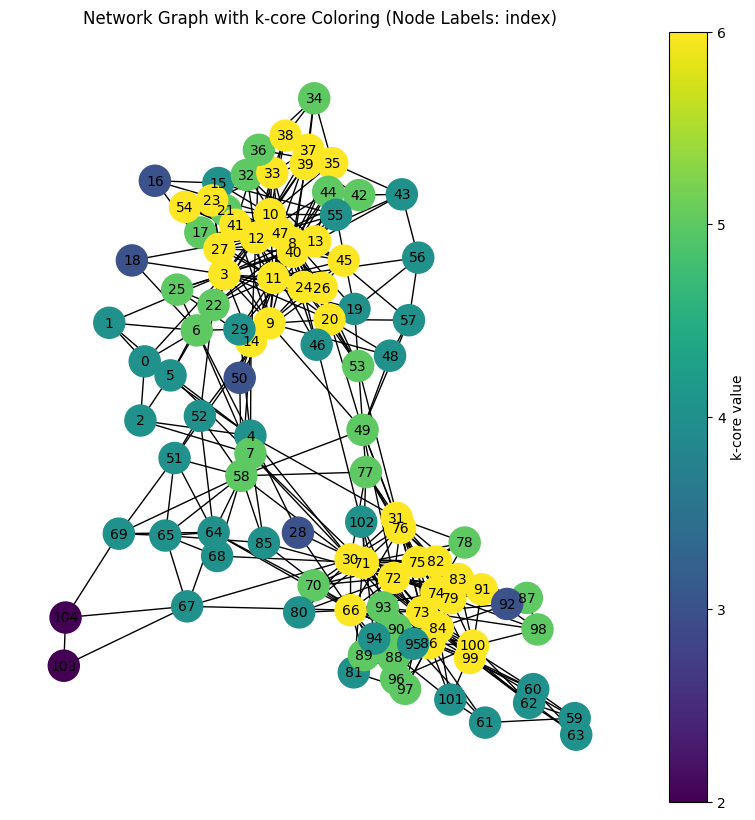

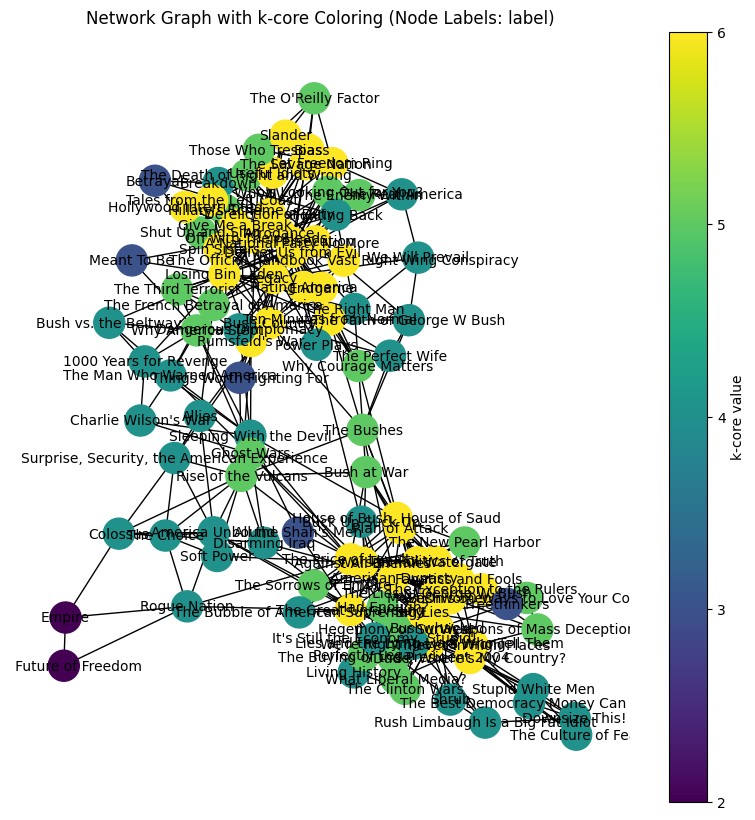

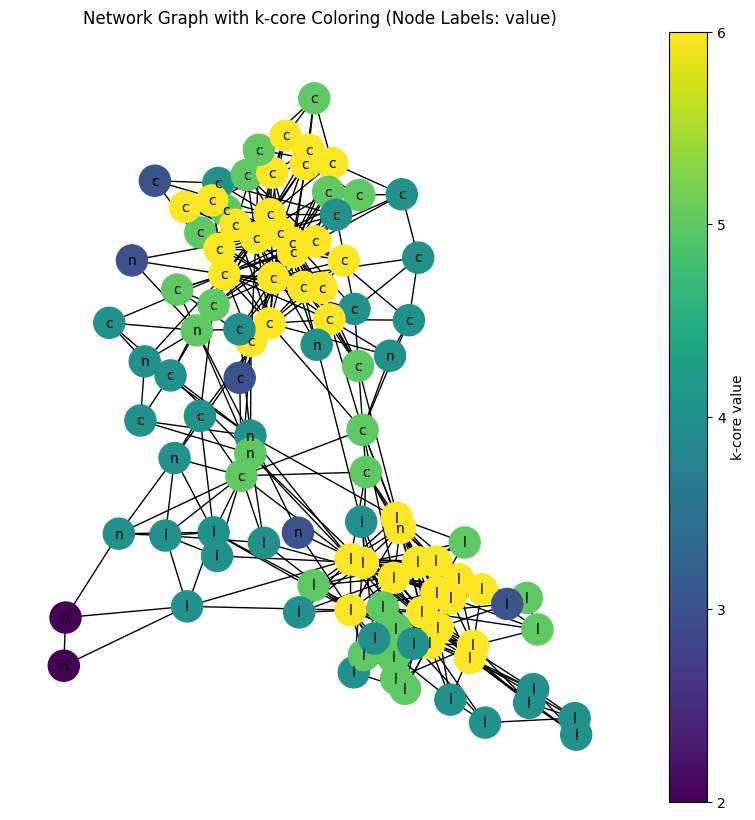

index  k_core_value                                             label  \
0        1             4                              Bush vs. the Beltway   
1        0             4                            1000 Years for Revenge   
2        2             4                              Charlie Wilson's War   
3        3             6                                  Losing Bin Laden   
4        4             4                           Sleeping With the Devil   
5        5             4                        The Man Who Warned America   
6        6             5                                 Why America Slept   
7        7             5                                        Ghost Wars   
8        8             6                          A National Party No More   
9        9             6                                      Bush Country   
10      10             6                               Dereliction of Duty   
11      11             6                                            Legacy   
12      12             6                              Off with Their Heads   
13      13             6                                       Persecution   
14      14             6                                    Rumsfeld's War   
15      15             4                                         Breakdown   
16      16             3                                          Betrayal   
17      17             5                                  Shut Up and Sing   
18      18             3                                       Meant To Be   
19      19             4                                     The Right Man   
20      20             6                           Ten Minutes from Normal   
21      21             5                                  Hillary's Scheme   
22      22             5                    The French Betrayal of America   
23      23             6                         Tales from the Left Coast   
24      24             6                                    Hating America   
25      25             5                               The Third Terrorist   
26      26             6                                           Endgame   
27      27             6                                      Spin Sisters   
28      28             3                                All the Shah's Men   
29      29             4                              Dangerous Dimplomacy   
30      30             6                              The Price of Loyalty   
31      31             6                      House of Bush, House of Saud   
32      32             5                      The Death of Right and Wrong   
33      33             6                                     Useful Idiots   
34      35             6                                  Let Freedom Ring   
35      34             5                               The O'Reilly Factor   
36      36             5                                Those Who Trespass   
37      37             6                                              Bias   
38      38             6                                           Slander   
39      39             6                                 The Savage Nation   
40      40             6                              Deliver Us from Evil   
41      41             6                                   Give Me a Break   
42      42             5                                  The Enemy Within   
43      43             4                                  The Real America   
44      44             5                        Who's Looking Out for You?   
45      45             6  The Official Handbook Vast Right Wing Conspiracy   
46      46             4                                       Power Plays   
47      47             6                                         Arrogance   
48      48             4                                  The Perfect Wife   
49      49             5                                        The Bushes   
50      50             3   

In [84]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_k_core_graph(G, k_core, node_attr, figsize=(10, 10), seed=42):
  """
  Plots a network graph with node colors representing k-core values.

  Args:
    G: NetworkX graph object.
    k_core: Dictionary containing k-core values for each node in the graph.
    node_attr: String specifying the node attribute to use for labels ('index', 'label', or 'value').
    figsize: Tuple specifying the figure size.
    seed: Seed for the spring layout.

  Returns:
    None
  """

  fig, ax = plt.subplots(figsize=figsize)

  # Create the spring layout for the graph
  pos = nx.spring_layout(G, seed=seed)

  # Set node colors based on k-core values
  node_colors = [k_core[node] for node in G.nodes]

  # Draw the graph with node colors based on k-core values
  nodes = nx.draw_networkx_nodes(
      G, pos, node_color=node_colors, cmap=plt.cm.viridis, node_size=500, ax=ax
  )
  nx.draw_networkx_edges(G, pos, ax=ax)

  # Determine labels based on node_attr
  if node_attr == 'index':
    labels = {node: str(node) for node in G.nodes}
  elif node_attr == 'label':
    labels = {node: G.nodes[node].get('label', '') for node in G.nodes}
  elif node_attr == 'value':
    labels = {node: str(G.nodes[node].get('value', '')) for node in G.nodes}
  else:
    raise ValueError("Invalid node_attr. Choose 'index', 'label', or 'value'.")

  nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, ax=ax)

  # Create a ScalarMappable object
  sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=min(node_colors), vmax=max(node_colors)))
  sm.set_array([])  # Set an empty array for the ScalarMappable

  # Add a color bar with a separate axis
  cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
  cbar.set_label('k-core value')

  # Set the limits of the colormap and force integer ticks
  cbar.mappable.set_clim(vmin=int(min(node_colors)), vmax=int(max(node_colors)))
  cbar.set_ticks(np.arange(int(min(node_colors)), int(max(node_colors)) + 1))

  # Final touches
  ax.set_title(f"Network Graph with k-core Coloring (Node Labels: {node_attr})")
  ax.axis('off')  # Turn off axis for the graph
  plt.show()

k_core = nx.core_number(G)

max_k = max(k_core.values())
min_k = min(k_core.values())
for i in range(min_k, max_k+1):
    print(f'Num of nodes with core number {i}: {len([number for number in k_core.values() if number==i])}')
node_colors = [k_core[node] for node in G.nodes]

plot_k_core_graph(G, k_core, 'index')  # Plot with node indices as labels
plot_k_core_graph(G, k_core, 'label')  # Plot with node labels as labels
plot_k_core_graph(G, k_core, 'value')  # Plot with node values as labels
summary_df = pd.DataFrame({
    'index': list(G.nodes),
    'k_core_value': [k_core[node] for node in G.nodes],
    'label': [G.nodes[node].get('label', '') for node in G.nodes],
    'value': [G.nodes[node].get('value', None) for node in G.nodes]
})

# Display the DataFrame
summary_df

## Triad Census

In [85]:
# Convert the graph to a directed graph
G_directed = G.to_directed()

# Compute Triad Census for the directed graph
triads = nx.triadic_census(G_directed)

# Display the triads and their counts
triads


{'003': 146299,
 '012': 0,
 '102': 37459,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 3142,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 560}

The analysis shows a fragmented network with many isolated nodes. While mostly disconnected, there are signs of potential growth with numerous pairs of connected nodes ('102' triads). Small clusters ('300' triads) and some hub-like nodes ('201' triads) also exist. The absence of directed triads is expected in this undirected graph. Overall, the network has a mix of isolation, weak ties, and local clusters.

## Other

In [86]:
G.nodes

NodeView((1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 35, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 60, 59, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104))

In [87]:
import networkx as nx
import pandas as pd
import numpy as np
import altair as alt

def homophily(mixed_edges, total_edges, p_c, p_l, p_n):
    """
    Calculates homophily, a measure of the tendency for nodes with similar attributes to connect.

    Args:
        mixed_edges: The number of edges connecting nodes with different attributes.
        total_edges: The total number of edges in the network.
        p_c: Proportion of nodes with attribute 'c'.
        p_l: Proportion of nodes with attribute 'l'.
        p_n: Proportion of nodes with attribute 'n'.

    Returns:
        Homophily score: The difference between the expected and observed proportion of mixed edges.
    """

    # Calculate the expected probability of mixed edges
    mixed_edge_probability_c_l = 2 * p_c * p_l
    mixed_edge_probability_c_n = 2 * p_c * p_n
    mixed_edge_probability_l_n = 2 * p_l * p_n

    # Total expected probability of mixed edges
    total_expected_mixed_edges = mixed_edge_probability_c_l + mixed_edge_probability_c_n + mixed_edge_probability_l_n

    # Expected proportion of mixed edges
    expected_proportion_mixed_edges = total_expected_mixed_edges / 2 

    # Observed proportion of mixed edges
    observed_proportion_mixed_edges = mixed_edges / total_edges

    # Return homophily measure (difference between expected and observed)
    return expected_proportion_mixed_edges - observed_proportion_mixed_edges
# Assuming 'value' is the node attribute that contains labels 'c', 'l', 'n'
political_labels = [G.nodes[node].get('value', '') for node in G.nodes]  # Get 'value' for node labels (c, l, n)

# Get the proportions of each label (c, l, n)
p_c = political_labels.count('c') / len(political_labels)
p_l = political_labels.count('l') / len(political_labels)
p_n = political_labels.count('n') / len(political_labels)

# Find the total number of mixed edges in the network
mixed_edges = len([(s, t) for s, t in G.edges if G.nodes[s]['value'] != G.nodes[t]['value']])

# Get the total number of edges in the graph
total_edges = G.number_of_edges()

# Calculate homophily measure
obs_homophily = homophily(mixed_edges, total_edges, p_c, p_l, p_n)
print(f"Observed Homophily: {obs_homophily}")

# Create a simulation function for reshuffling the 'value' attribute
def simulate_mixed_edges(attribute, graph):
    # Reshuffle the node attributes and set them back
    attr_column = [G.nodes[node].get(attribute, '') for node in G.nodes]
    shuffled_attr_column = np.random.permutation(attr_column)  # Shuffle values
    # Set the shuffled values back as node attributes
    for node, new_attr in zip(G.nodes, shuffled_attr_column):
        G.nodes[node][attribute] = new_attr
    
    # Calculate mixed edges after reshuffling
    mixed_edges = len([(s, t) for s, t in graph.edges if graph.nodes[s][attribute] != graph.nodes[t][attribute]])
    return mixed_edges

# Simulate homophily 5000 times using permutation
sim_homophily = pd.DataFrame().assign(sim_homophily=[
    homophily(simulate_mixed_edges('value', G), total_edges, p_c, p_l, p_n) for i in range(5000)
])

# Plotting the results
histogram = alt.Chart(sim_homophily).mark_bar().encode(
    x=alt.X("sim_homophily:Q").bin(maxbins=20),
    y=alt.Y("count():Q")
)

# Add a red line for the observed homophily value
sim_homophily = sim_homophily.assign(obs_homophily=obs_homophily)
observed_difference = alt.Chart(sim_homophily).mark_rule(color="red", strokeDash=(8, 4)).encode(
    x=alt.X("obs_homophily")
)

# Combine histogram and the observed homophily line
histogram + observed_difference

# Calculate p-value for the observed homophily
p_value = np.mean(sim_homophily > obs_homophily)
print(f"P-value: {p_value}")


Observed Homophily: 0.1408616780045352
P-value: 0.0


In [88]:
import networkx as nx
import pandas as pd
import numpy as np
import altair as alt

def modularity_test(G, num_simulations=500):
    """
    Tests the significance of the modularity score of a given network.

    Args:
        G: The NetworkX graph object.
        num_simulations: The number of simulations to perform.

    Returns:
        A tuple containing:
            - Observed modularity score.
            - P-value.
            - DataFrame containing simulated modularity scores.
    """

    # Get initial community assignment using a built-in algorithm
    communities = list(nx.algorithms.community.greedy_modularity_communities(G))

    # Calculate observed modularity
    observed_modularity = nx.algorithms.community.modularity(G, communities)

    # Simulate modularity
    simulated_modularity = []
    for _ in range(num_simulations):
        # Extract degree sequence as a list
        degree_sequence = list(G.degree())  # Get degrees as tuples

        # Unpack tuples into a list of integers
        degree_sequence = [d for d, _ in degree_sequence]

        # Create a random graph with the same degree sequence
        random_graph = nx.configuration_model(degree_sequence)
        random_communities = list(nx.algorithms.community.greedy_modularity_communities(random_graph))
        simulated_modularity.append(nx.algorithms.community.modularity(random_graph, random_communities))

    # Create a DataFrame for simulated modularity scores
    simulated_modularity_df = pd.DataFrame({'sim_modularity': simulated_modularity})

    # Plotting the results
    histogram = alt.Chart(simulated_modularity_df).mark_bar().encode(
        x=alt.X("sim_modularity:Q").bin(maxbins=20),  # Field name specified
        y=alt.Y("count():Q")
    )

    # Add a red line for the observed modularity value
    observed_difference = alt.Chart(pd.DataFrame({'obs_modularity': [observed_modularity]})).mark_rule(color="red", strokeDash=(8, 4)).encode(
        x=alt.X('obs_modularity:Q')
    )

    # Combine histogram and the observed modularity line
    chart = histogram + observed_difference

    # Calculate p-value
    p_value = np.mean(np.array(simulated_modularity) >= observed_modularity)

    return observed_modularity, p_value, simulated_modularity_df, chart


# Example usage:
observed_modularity, p_value, sim_df, chart = modularity_test(G)

print(f"Observed Modularity: {observed_modularity}")
print(f"P-value: {p_value}")

# Display the plot
chart.show()


Observed Modularity: 0.5019744859395006
P-value: 0.0


alt.LayerChart(...)

In [89]:
import networkx as nx
import numpy as np

def compute_small_worldness(G, num_simulations=100):
    """
    Calculates the small-worldness coefficient of a given graph.

    Args:
        G: The NetworkX graph object.
        num_simulations: The number of random graphs to generate for comparison.

    Returns:
        The small-worldness coefficient.
    """

    # Calculate clustering coefficient of the original graph
    C = nx.average_clustering(G)

    # Calculate average shortest path length of the original graph
    try:
        L = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # In case the graph is disconnected
        L = float('inf')

    # Calculate clustering coefficient and average shortest path length for random graphs
    C_random_list = []
    L_random_list = []
    for _ in range(num_simulations):
        # Generate a random graph with the same number of nodes and edges
        random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), 0.5)  # Erdős–Rényi model for random graphs
        while not nx.is_connected(random_graph):
            random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), 0.5)

        try:
            C_random_list.append(nx.average_clustering(random_graph))
            L_random_list.append(nx.average_shortest_path_length(random_graph))
        except (nx.NetworkXError, ZeroDivisionError):
            # Handle cases where random graphs are disconnected or have no edges
            C_random_list.append(0)
            L_random_list.append(float('inf'))

    # Calculate average clustering and path length for random graphs
    C_random_avg = np.mean(C_random_list)
    L_random_avg = np.mean(L_random_list)

    # Calculate small-worldness
    if L_random_avg == 0 or C_random_avg == 0:
        small_worldness = 0
    else:
        small_worldness = (C / C_random_avg) / (L / L_random_avg)

    return small_worldness

# Example usage:
# Assuming you have a NetworkX graph G
small_worldness_value = compute_small_worldness(G)
print(f"Small-Worldness: {small_worldness_value}")


Small-Worldness: 0.47481058233064655


In [90]:
import networkx as nx
import numpy as np

def compute_small_worldness(G, num_simulations=100):
    """
    Calculates the small-worldness coefficient of a given graph.

    Args:
        G: The NetworkX graph object.
        num_simulations: The number of random graphs to generate for comparison.

    Returns:
        The small-worldness coefficient and p-value for hypothesis testing.
    """

    # Calculate clustering coefficient of the original graph
    C = nx.average_clustering(G)

    # Calculate average shortest path length of the original graph
    try:
        L = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # In case the graph is disconnected
        L = float('inf')

    # Calculate clustering coefficient and average shortest path length for random graphs
    C_random_list = []
    L_random_list = []
    for _ in range(num_simulations):
        # Generate a random graph with the same number of nodes and edges
        random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), 0.5)  # Erdős–Rényi model for random graphs
        while not nx.is_connected(random_graph):
            random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), 0.5)

        try:
            C_random_list.append(nx.average_clustering(random_graph))
            L_random_list.append(nx.average_shortest_path_length(random_graph))
        except (nx.NetworkXError, ZeroDivisionError):
            # Handle cases where random graphs are disconnected or have no edges
            C_random_list.append(0)
            L_random_list.append(float('inf'))

    # Calculate average clustering and path length for random graphs
    C_random_avg = np.mean(C_random_list)
    L_random_avg = np.mean(L_random_list)

    # Calculate small-worldness
    if L_random_avg == 0 or C_random_avg == 0:
        small_worldness = 0
    else:
        small_worldness = (C / C_random_avg) / (L / L_random_avg)

    # Calculate p-value (proportion of random graphs with small-worldness higher than the observed)
    p_value = np.mean(np.array([((C_r / C_random_avg) / (L_r / L_random_avg)) >= small_worldness for C_r, L_r in zip(C_random_list, L_random_list)]))

    return small_worldness, p_value

# Example usage:
# Assuming you have a NetworkX graph G
small_worldness_value, p_value = compute_small_worldness(G)
print(f"Small-Worldness: {small_worldness_value}")
print(f"P-value: {p_value}")

# Hypothesis test interpretation:
if p_value < 0.05:
    print("Reject the null hypothesis: The graph exhibits small-worldness.")
else:
    print("Fail to reject the null hypothesis: The graph does not exhibit small-worldness.")


Small-Worldness: 0.47562936674364936
P-value: 1.0
Fail to reject the null hypothesis: The graph does not exhibit small-worldness.


In [91]:
import networkx as nx
import pandas as pd
from collections import Counter
import numpy as np

# Homophily
def compute_homophily(G):
    node_labels = {node: data['value'] for node, data in G.nodes(data=True)} 
    same_label_edges = 0
    total_edges = 0
    
    for u, v in G.edges():
        total_edges += 1
        if node_labels[u] == node_labels[v]:
            same_label_edges += 1
            
    homophily_ratio = same_label_edges / total_edges if total_edges > 0 else 0
    return homophily_ratio

# Modularity
def compute_modularity(G):
    from networkx.algorithms.community import greedy_modularity_communities
    communities = list(greedy_modularity_communities(G))
    modularity = nx.algorithms.community.modularity(G, communities)
    return modularity

# Small-Worldness
def compute_small_worldness(G):
    # Clustering coefficient
    clustering_coeff = nx.average_clustering(G)
    
    # Average shortest path length
    try:
        avg_shortest_path = nx.average_shortest_path_length(G)
    except nx.NetworkXError:
        # In case the graph is disconnected, NetworkX throws an error
        avg_shortest_path = float('inf')
    
    # Compare clustering coefficient and shortest path to random graph
    # Small-worldness ratio = (C / C_random) / (L / L_random)
    # Where C is the clustering coefficient, and L is the average shortest path length
    
    # For simplicity, we assume C_random and L_random are calculated for a random graph with the same number of nodes and edges
    # Here, we use an approximation based on random rewiring
    random_graph = nx.erdos_renyi_graph(G.number_of_nodes(), 0.1)
    C_random = nx.average_clustering(random_graph)
    try:
        L_random = nx.average_shortest_path_length(random_graph)
    except nx.NetworkXError:
        L_random = float('inf')
    
    small_worldness = (clustering_coeff / C_random) / (avg_shortest_path / L_random) if L_random != 0 else 0
    return small_worldness

# Scale-Freeness
def compute_scale_freeness(G):
    degrees = [degree for node, degree in G.degree()]
    degree_count = Counter(degrees)
    degree_freq = np.array(list(degree_count.values()))
    degree_values = np.array(list(degree_count.keys()))
    
    # Fit a power law distribution to the degree distribution
    from scipy.stats import powerlaw
    try:
        fit = powerlaw.Fit(degrees)
        alpha = fit.alpha
        r_value = fit.R
        scale_freeness = (alpha, r_value)
    except Exception as e:
        scale_freeness = None
    return scale_freeness

# Compute all metrics
homophily = compute_homophily(G)
modularity = compute_modularity(G)
small_worldness_value = compute_small_worldness(G)
scale_freeness_value = compute_scale_freeness(G)

# Print results
print(f"Homophily: {homophily}")
print(f"Modularity: {modularity}")
print(f"Small-Worldness: {small_worldness_value}")
print(f"Scale-Freeness: {scale_freeness_value}")


Homophily: 0.3741496598639456
Modularity: 0.5019744859395006
Small-Worldness: 3.226411540647166
Scale-Freeness: None


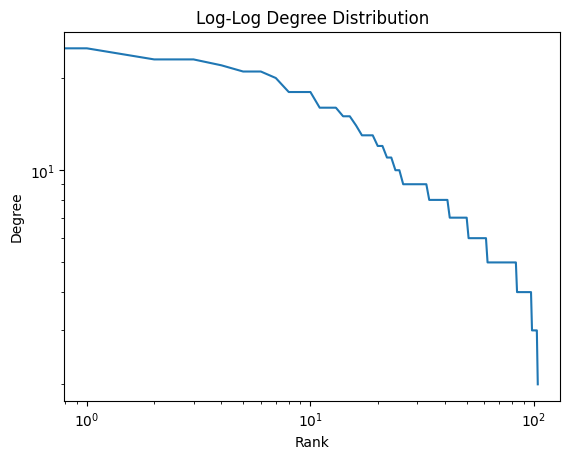

In [96]:
degrees = sorted(dict(G.degree()).values(), reverse=True)

plt.loglog(degrees)
plt.title('Log-Log Degree Distribution')
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.show()
